In [ ]:
import random
from scipy import stats

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb

import shap
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_invariants = pd.read_excel('../invariants_generation/invariants_plusminus2.xlsx')

In [ ]:
df_invariants

,weight_edges_vertices,weight_edges,average_degree_connectivity,degree_assortativity,local_efficiency,degree_centrality,average_neighbor_degree,global_efficiency,estrada_index,wiener_index,pagerank,path,label
0,480.968424,153.366722,4.418949,0.489919,0.694097,0.002042,5.292324,0.018038,51030.754215,999999999999999,0.000326,./cells/1_1_0_1058.jpg,1
1,470.067383,149.952960,3.817105,0.502017,0.694683,0.002042,5.290717,0.018053,51009.035758,999999999999999,0.000326,./cells/1_1_0_1060.jpg,1
2,470.273763,149.925384,4.383923,0.482620,0.693712,0.002043,5.294178,0.018038,51014.170302,999999999999999,0.000326,./cells/1_1_0_1629.jpg,1
3,484.121419,153.876979,3.990215,0.488614,0.693327,0.002049,5.309910,0.018062,51549.864017,999999999999999,0.000326,./cells/1_1_0_1679.jpg,1
4,481.160807,153.443995,4.053660,0.482634,0.694499,0.002042,5.292621,0.018036,51080.361284,999999999999999,0.000326,./cells/1_1_0_1784.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,475.397461,150.496805,4.205025,0.524694,0.692280,0.002057,5.333949,0.018067,52187.386438,999999999999999,0.000326,./cells/108_0_0_9420.jpg,0
3227,480.379232,152.058217,4.528269,0.532060,0.692122,0.002057,5.333977,0.018068,52178.056212,999999999999999,0.000326,./cells/108_0_0_954.jpg,0
3228,471.858398,149.746798,4.120262,0.520370,0.693164,0.002052,5.319940,0.018055,51920.226171,999999999999999,0.000326,./cells/108_0_0_9558.jpg,0
3229,481.408854,152.117671,4.526324,0.519240,0.691618,0.002061,5.344628,0.018081,52406.161174,999999999999999,0.000326,./cells/108_0_0_9688.jpg,0


In [ ]:
df = df_invariants.copy()

In [ ]:
label = df.label

In [ ]:
lst = ['path_', 'label']
df = df.drop(lst, axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3, random_state=42)

In [ ]:
nams = list(X_test.columns)

In [ ]:
def process_graph_attributes(train, test):

	ss = StandardScaler()
	trainCols = ss.fit_transform(train)
	testCols = ss.transform(test)

	return trainCols, testCols

In [ ]:
X_train, X_test = process_graph_attributes(X_train, X_test)

In [ ]:
clf = xgb.XGBClassifier()

clf.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],
            early_stopping_rounds=5, eval_metric=["error", "logloss"])

[0]	validation_0-error:0.06546	validation_0-logloss:0.48482	validation_1-error:0.09588	validation_1-logloss:0.50464
[1]	validation_0-error:0.05927	validation_0-logloss:0.37062	validation_1-error:0.09381	validation_1-logloss:0.40363
[2]	validation_0-error:0.05352	validation_0-logloss:0.29681	validation_1-error:0.09072	validation_1-logloss:0.33992
[3]	validation_0-error:0.05042	validation_0-logloss:0.24528	validation_1-error:0.09072	validation_1-logloss:0.29803
[4]	validation_0-error:0.04821	validation_0-logloss:0.20866	validation_1-error:0.08351	validation_1-logloss:0.26715
[5]	validation_0-error:0.04157	validation_0-logloss:0.18067	validation_1-error:0.08557	validation_1-logloss:0.24332
[6]	validation_0-error:0.04113	validation_0-logloss:0.16042	validation_1-error:0.08454	validation_1-logloss:0.22530
[7]	validation_0-error:0.04113	validation_0-logloss:0.14538	validation_1-error:0.08454	validation_1-logloss:0.21423
[8]	validation_0-error:0.03892	validation_0-logloss:0.13392	validation_1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
clf.get_booster().feature_names = nams

In [ ]:
df_table =pd.DataFrame(clf.get_booster().get_score().items(), columns=['feature','weight_importance'])

In [ ]:
df_table

,feature,weight_importance
0,weight_edges_vertices,88.0
1,weight_edges,62.0
2,average_degree_connectivity,91.0
3,degree_assortativity,124.0
4,local_efficiency,52.0
5,degree_centrality,20.0
6,average_neighbor_degree,18.0
7,global_efficiency,71.0
8,estrada_index,112.0


In [ ]:
nams__ = ['wiener_index', 'pagerank']

for i in nams__:
    df_table = df_table.append({'feature':i}, ignore_index=True)

df_table = df_table.fillna(0)

In [ ]:
def ks_test(df, col, label, sample_size, pvalue):
    group_1 = df[df[label]==1][col]
    group_0 = df[df[label]==0][col]

    group_0 = group_0.values.tolist()
    group_0 = random.sample(group_0, sample_size)
    group_1 = group_1.values.tolist()
    group_1 = random.sample(group_1, sample_size)

    _, pnorm = stats.ks_2samp(group_1, group_0)

    print("stat",_)
    print('p value',pnorm)

    if pnorm <pvalue:
        print("we reject null hypothesis")
    else:
        print("we accept null hypothesis")
    return _

In [ ]:
ks_stat = []
for i in nams:
    ks_stat.append(ks_test(df_invariants, i, "label", 1400, 0.05))

stat 0.3692857142857143
p value 2.639166026239582e-85
we reject null hypothesis
stat 0.2885714285714286
p value 9.149520291247196e-52
we reject null hypothesis
stat 0.11214285714285714
p value 4.3781912753217245e-08
we reject null hypothesis
stat 0.6978571428571428
p value 0.0
we reject null hypothesis
stat 0.5335714285714286
p value 8.923967139225854e-183
we reject null hypothesis
stat 0.5628571428571428
p value 1.0637343637945072e-204
we reject null hypothesis
stat 0.5621428571428572
p value 3.796820208780394e-204
we reject null hypothesis
stat 0.45357142857142857
p value 3.801474879683446e-130
we reject null hypothesis
stat 0.6085714285714285
p value 5.299090315665091e-242
we reject null hypothesis
stat 0.0
p value 1.0
we accept null hypothesis
stat 0.0
p value 1.0
we accept null hypothesis


In [ ]:
df_table['ks_stat'] = ks_stat

In [ ]:
explainer = shap.Explainer(clf, feature_names=nams)
shap_values = explainer(X_test)

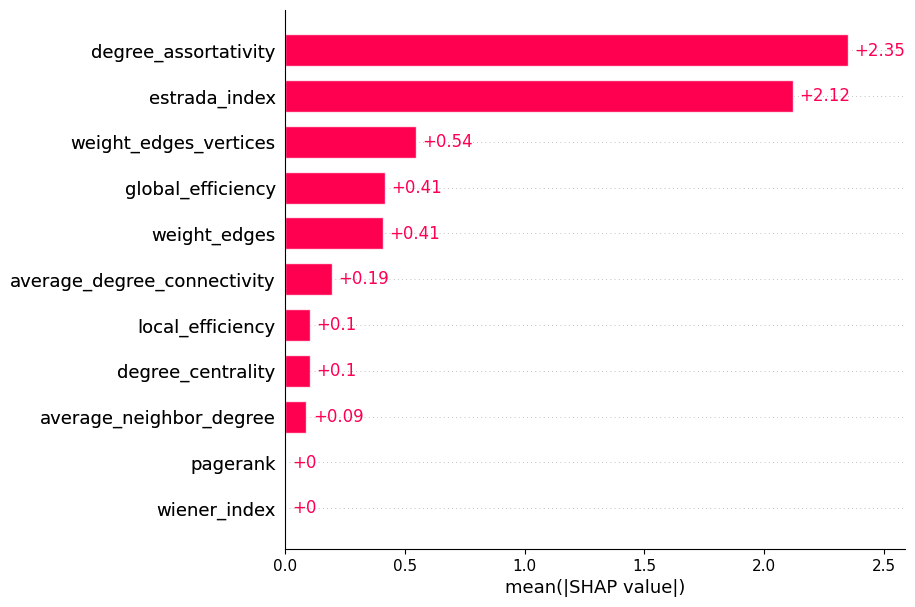

In [ ]:
shap.plots.bar(shap_values, max_display=len(nams))

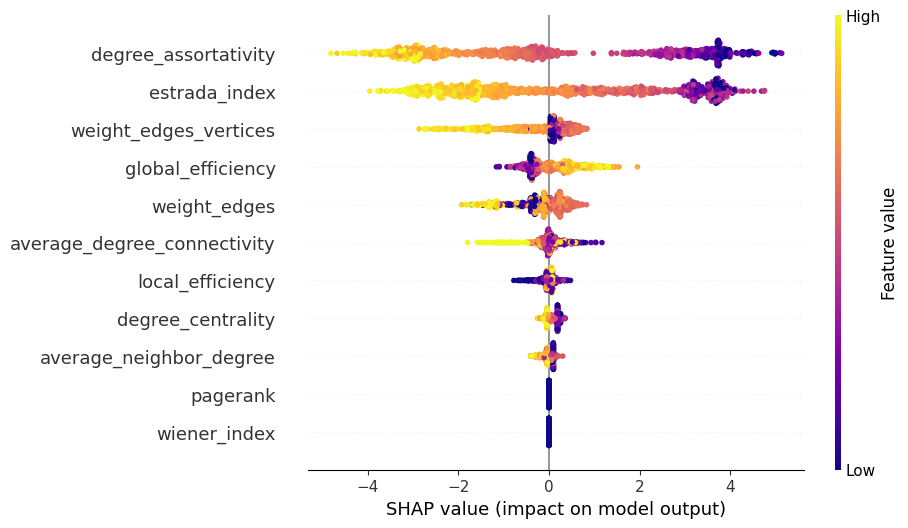

In [ ]:
shap.plots.beeswarm(shap_values, max_display=len(nams),color=plt.get_cmap("plasma"))

In [ ]:
shap_val = abs(shap_values.values).mean(axis=0)
shap_val

array([0.5447888 , 0.40698504, 0.19440287, 2.3502533 , 0.10219591,
       0.10100786, 0.08825186, 0.41476622, 2.1217735 , 0.        ,
       0.        ], dtype=float32)

In [ ]:
df_table['mean_shap_values'] = shap_val

In [ ]:
df_table

,feature,weight_importance,ks_stat,mean_shap_values
0,weight_edges_vertices,88.0,0.369286,0.544789
1,weight_edges,62.0,0.288571,0.406985
2,average_degree_connectivity,91.0,0.112143,0.194403
3,degree_assortativity,124.0,0.697857,2.350253
4,local_efficiency,52.0,0.533571,0.102196
5,degree_centrality,20.0,0.562857,0.101008
6,average_neighbor_degree,18.0,0.562143,0.088252
7,global_efficiency,71.0,0.453571,0.414766
8,estrada_index,112.0,0.608571,2.121773
9,wiener_index,0.0,0.000000,0.000000


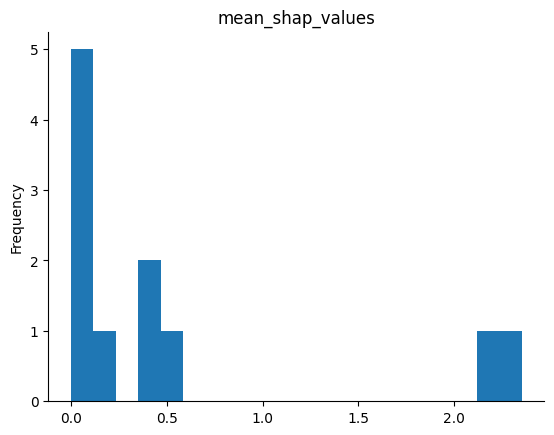

In [ ]:
df_table['mean_shap_values'].plot(kind='hist', bins=20, title='mean_shap_values')
plt.gca().spines[['top', 'right',]].set_visible(False)

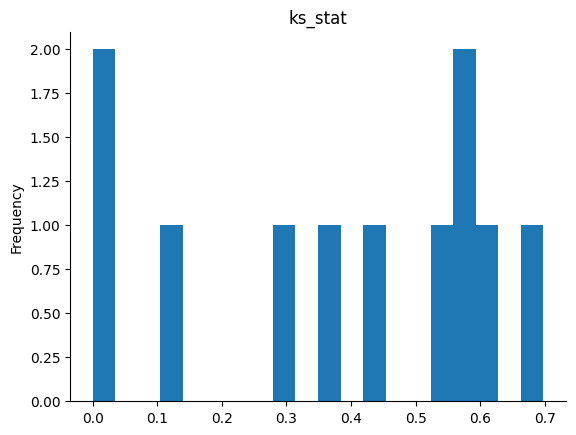

In [ ]:
df_table['ks_stat'].plot(kind='hist', bins=20, title='ks_stat')
plt.gca().spines[['top', 'right',]].set_visible(False)

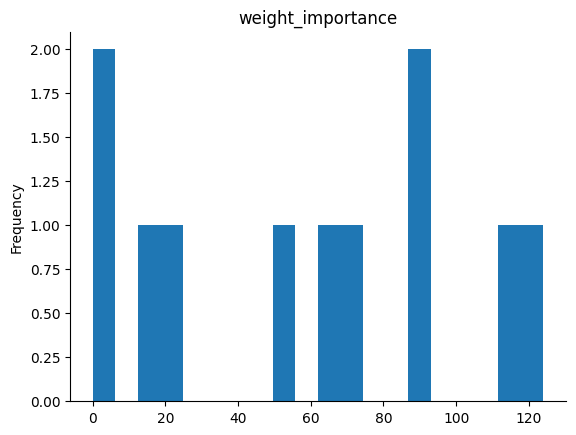

In [ ]:
df_table['weight_importance'].plot(kind='hist', bins=20, title='weight_importance')
plt.gca().spines[['top', 'right',]].set_visible(False)